'Before Filtering the shape (9903498, 27)'

'After Filter the shape (650384, 27)'

'Desire Filter shape (650384, 8)'

Schema([('FIRST_PURCHASE_NUMBER', Int16),
        ('PURCHASED_ON_HIRE', Int16),
        ('FIRST_PURCHASE_VALUE', Int16),
        ('REPAIR_COST', Int16),
        ('SECOND_HAND_NUMBER', Int16),
        ('SECOND_HAND_VALUE', Int16),
        ('TOTAL_EXPENDITURE', Int16),
        ('MULTIPLIER', Int16)])

Percentage of null values 
FIRST_PURCHASE_NUMBER ---> 83.44%
PURCHASED_ON_HIRE ---> 69.13%
FIRST_PURCHASE_VALUE ---> 33.54%
REPAIR_COST ---> 54.13%
SECOND_HAND_NUMBER ---> 99.95%
SECOND_HAND_VALUE ---> 99.90%
TOTAL_EXPENDITURE ---> 0.13%
MULTIPLIER ---> 90.41%


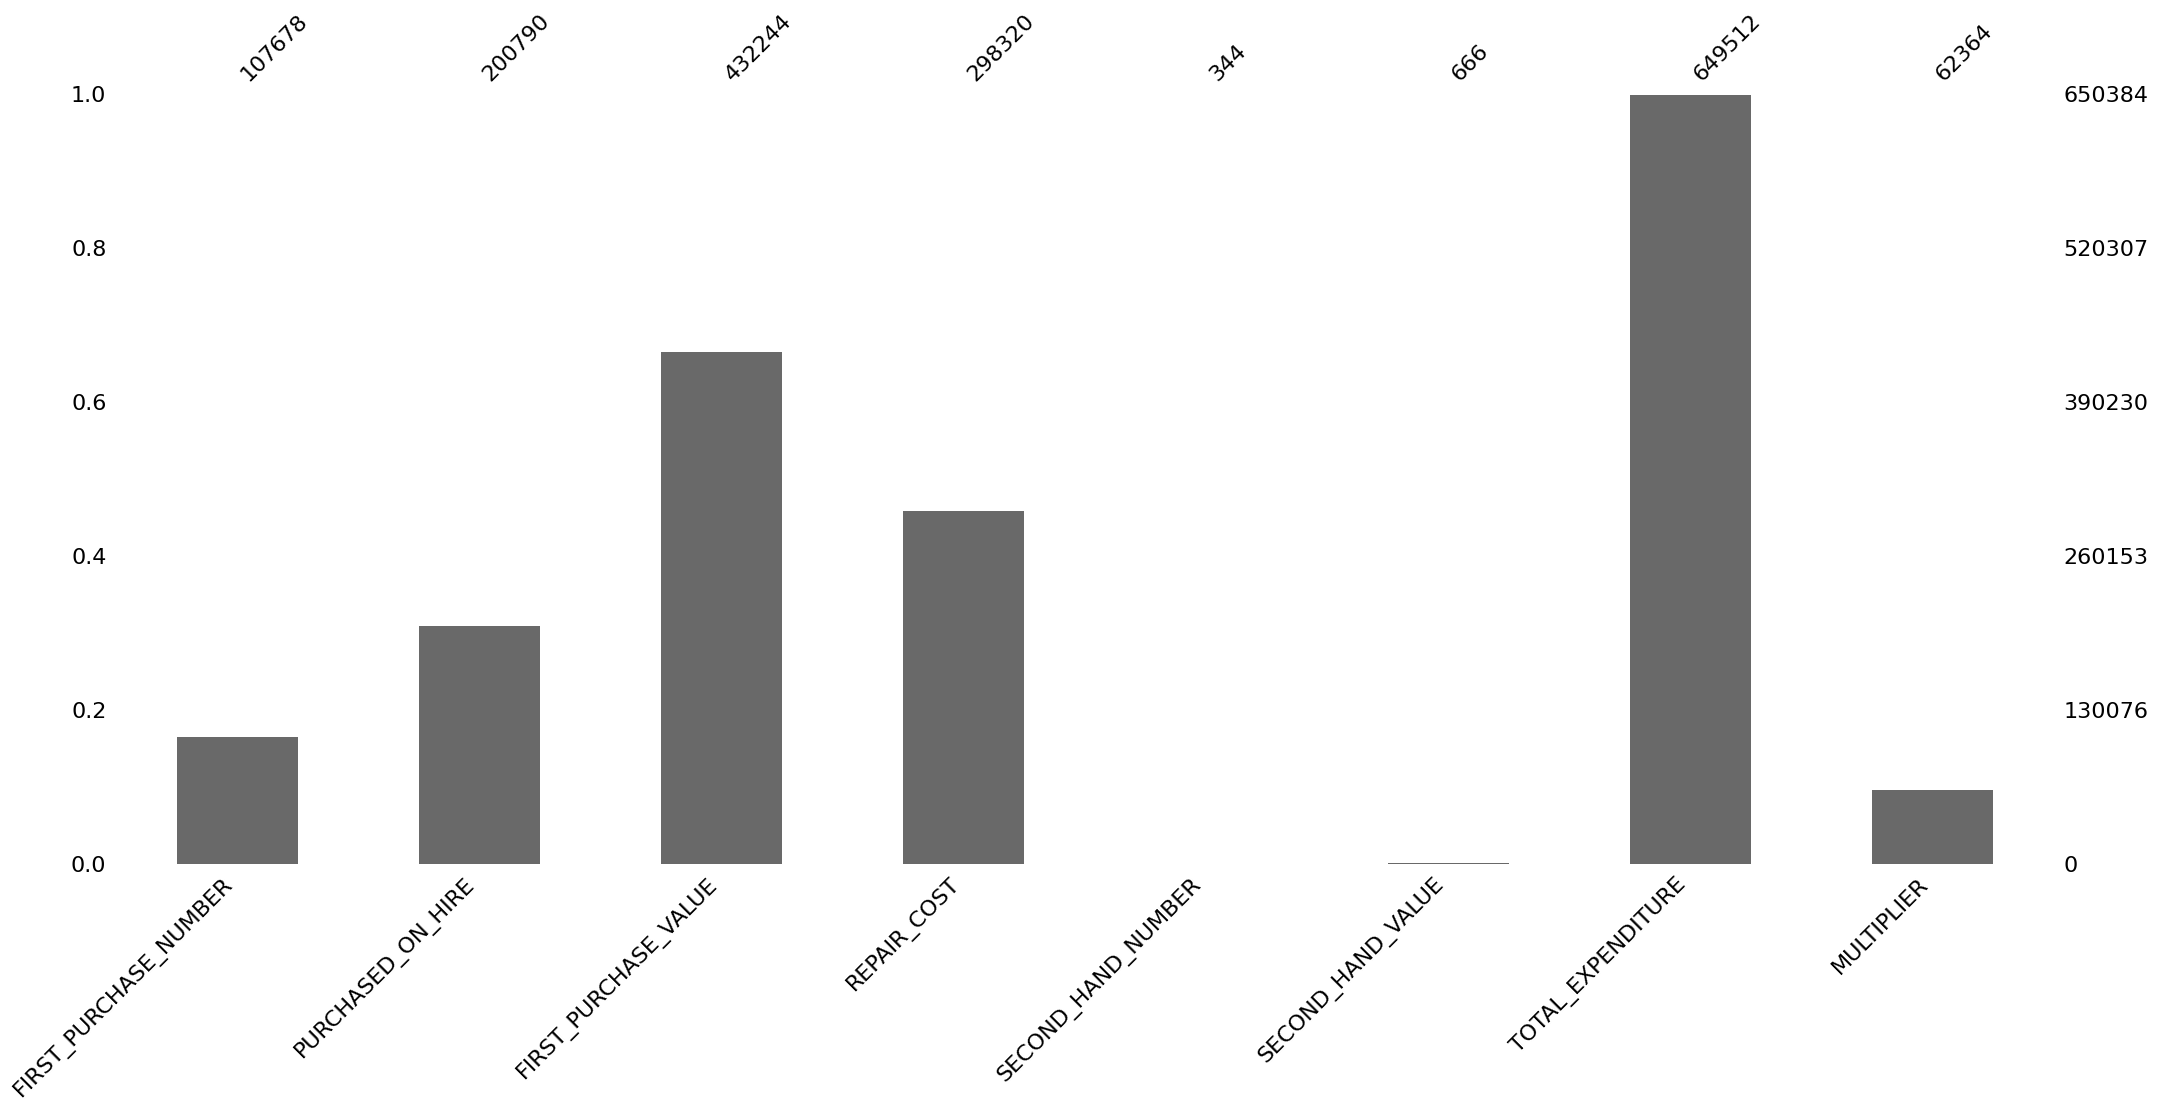

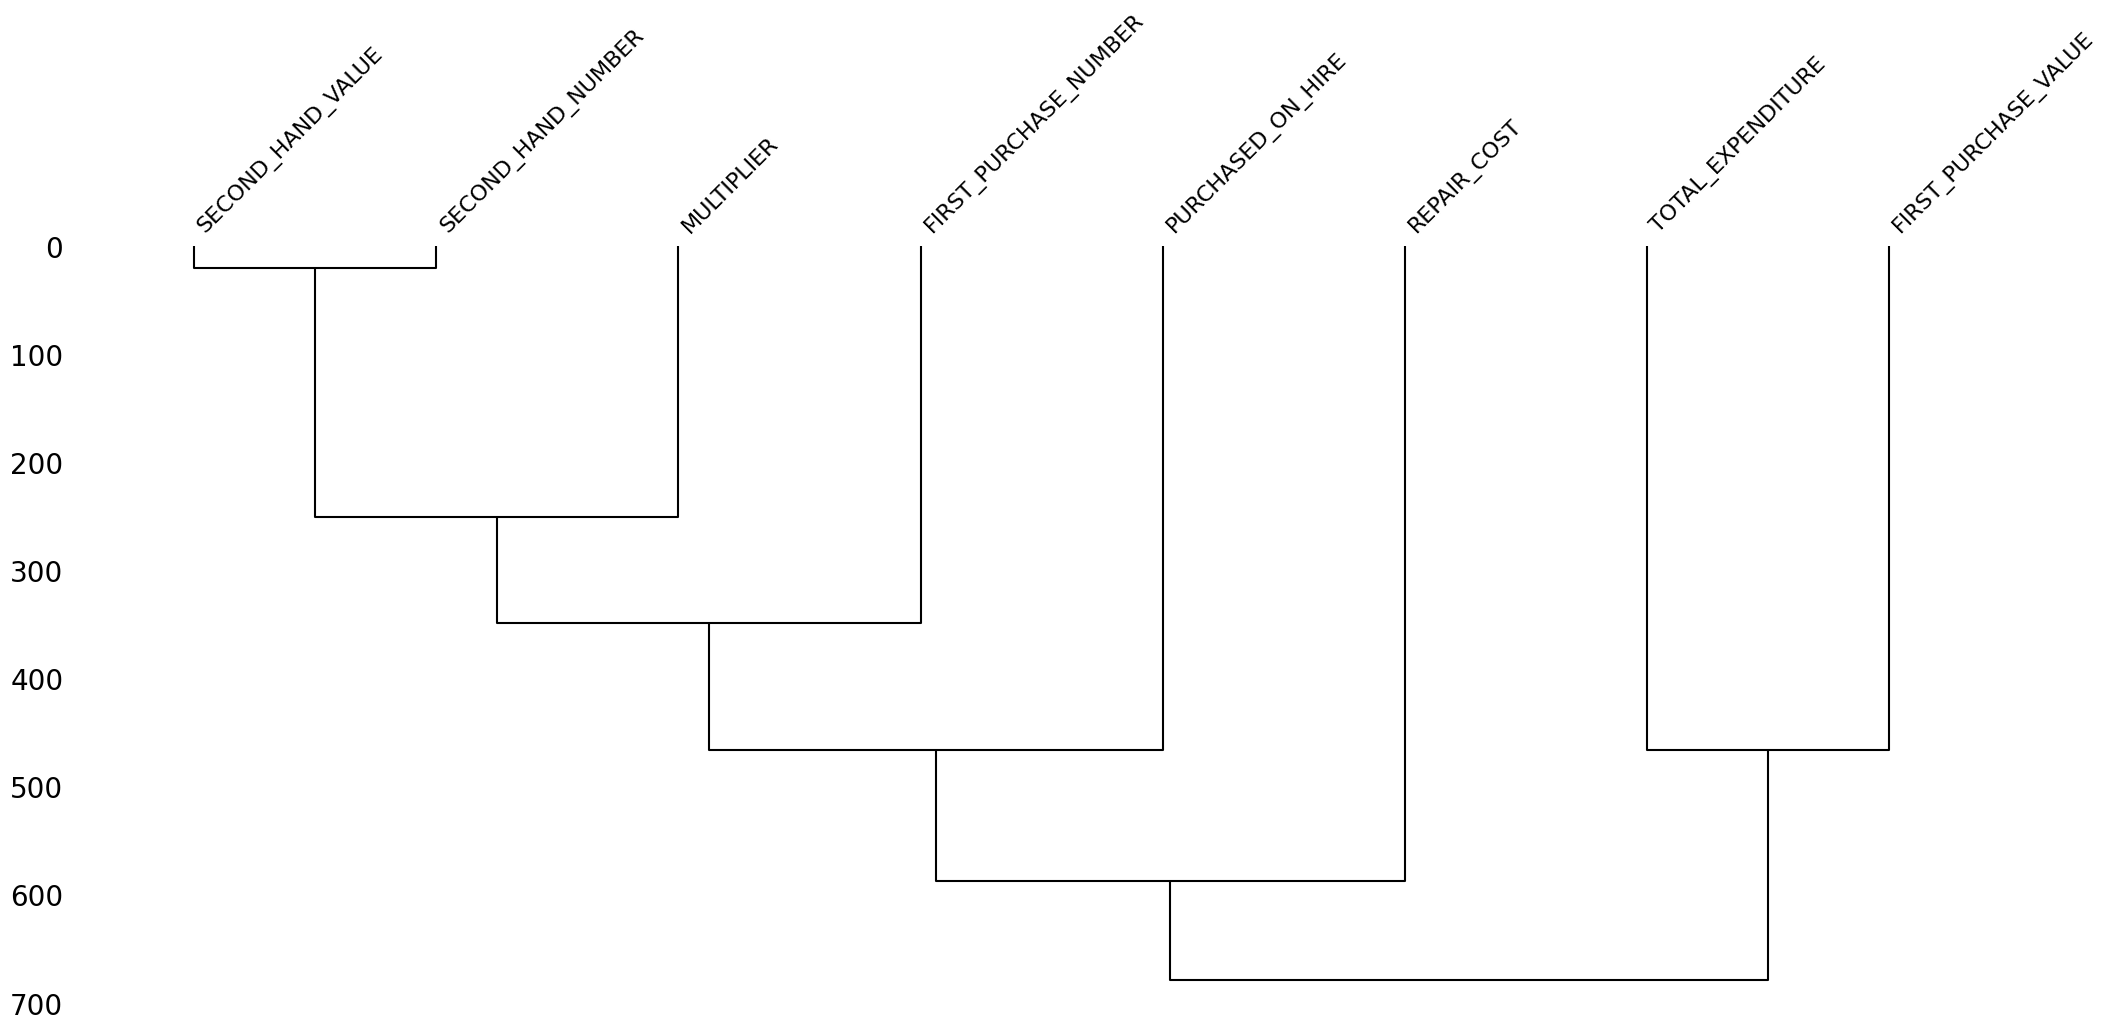

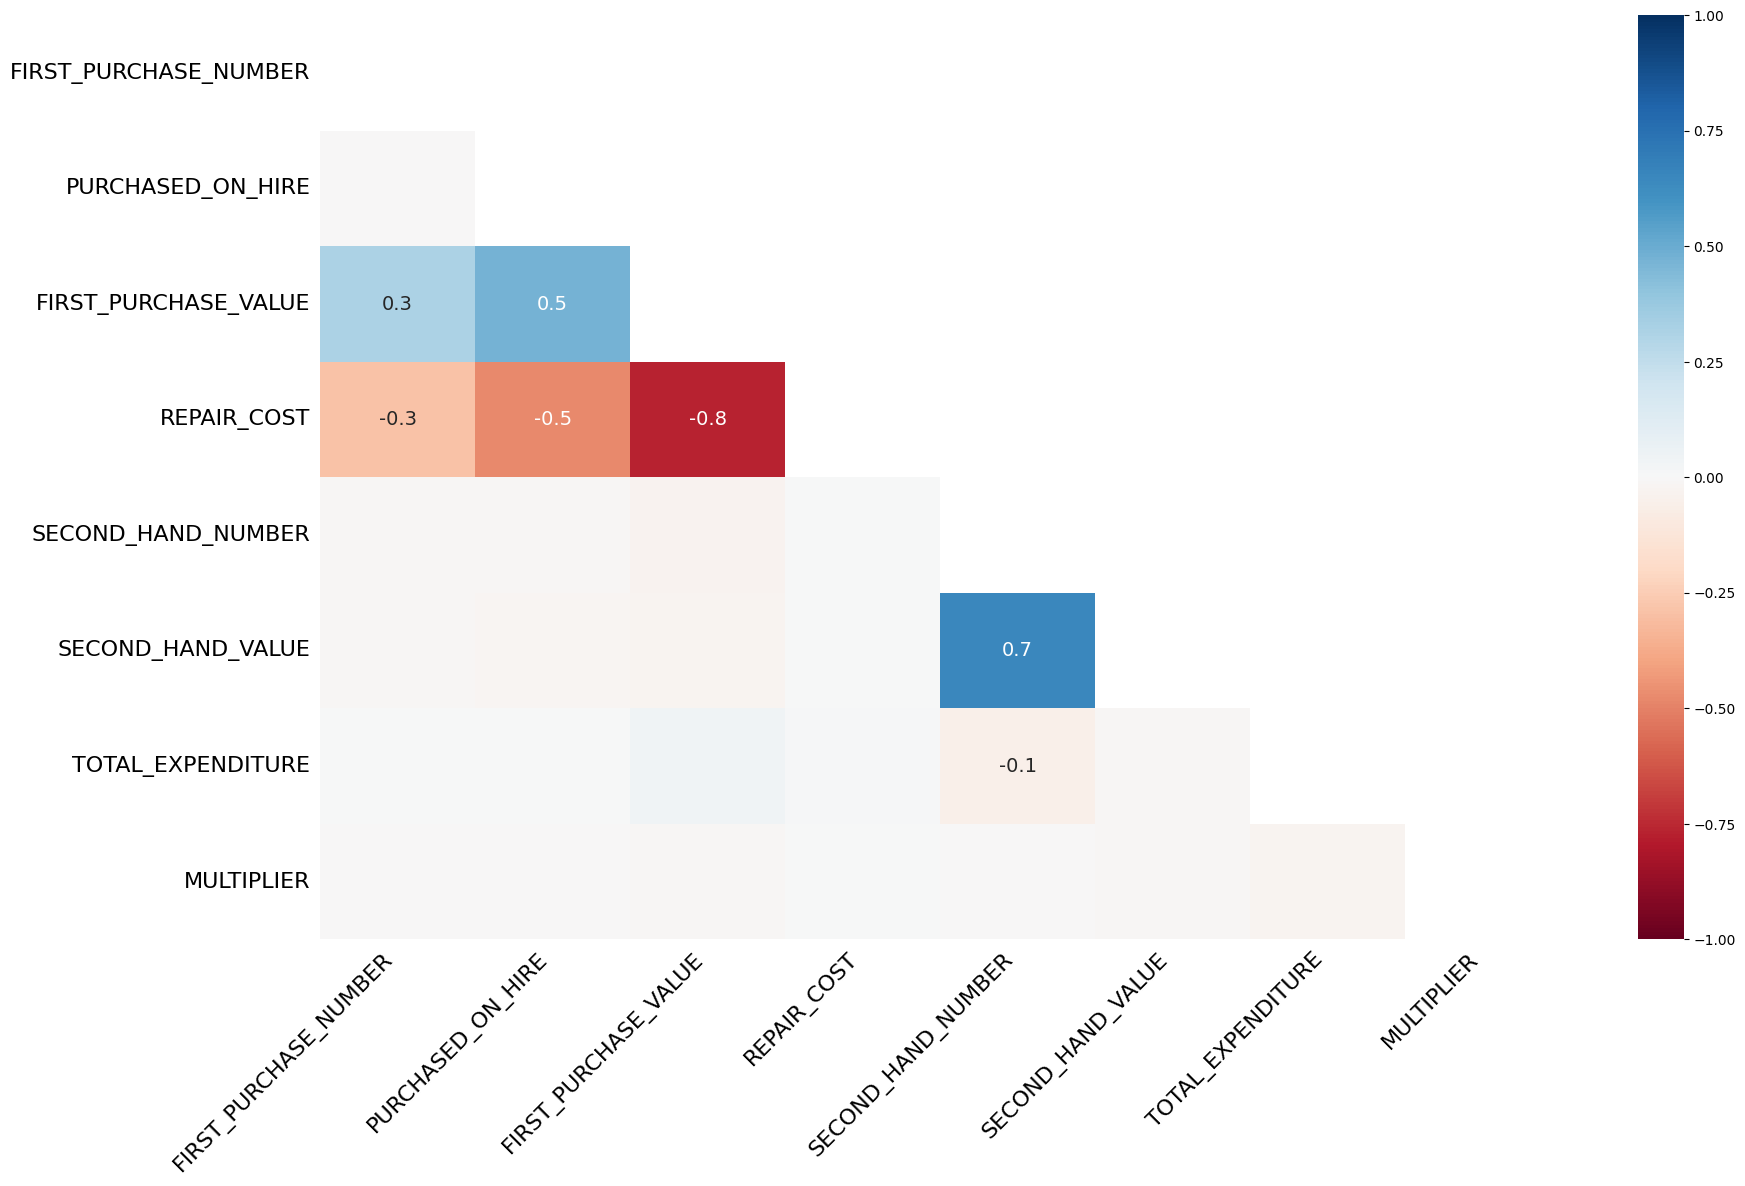

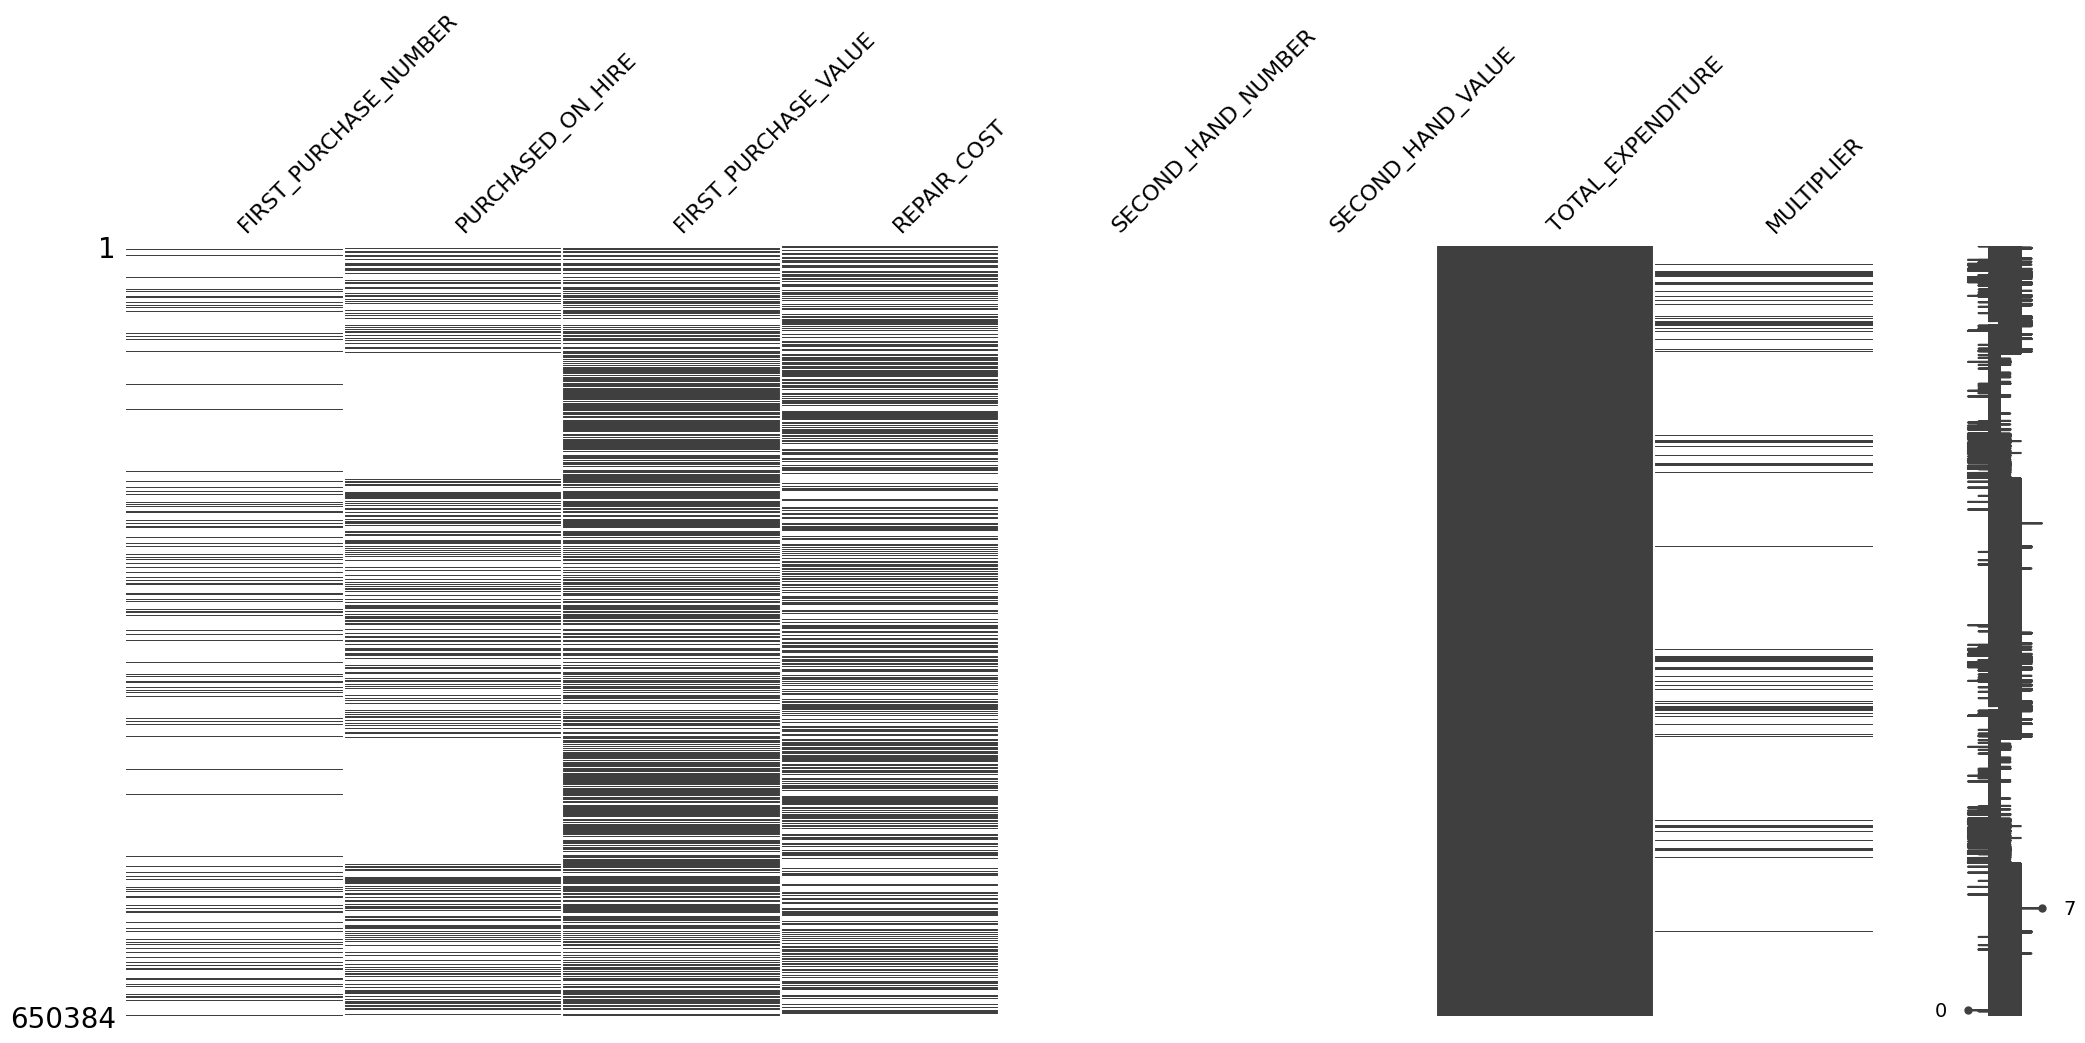

In [1]:
path = r"C:\Users\Rudra\Desktop\rural-financial-inclusion-govt-scheme-recommendation\parquet-data\lev-13\data\lev-13_merged.parquet"

# import 
import pandas as pd
import polars as pl
import missingno as msgo
import matplotlib.pyplot as plt
import seaborn as sns

# Functions define for plot null
def plot_null(df: pd.DataFrame):
    msgo.bar(df)
    msgo.dendrogram(df)
    msgo.heatmap(df)
    msgo.matrix(df)

# Import Data and filter
pdf = pl.read_parquet(path)
display(f"Before Filtering the shape {pdf.shape}")
pdf = pdf.filter(
    pl.col('State') == '23'
)
display(f"After Filter the shape {pdf.shape}")

# ------------------------ Our useful variables are 
# ===============================

cols = [
'FIRST_PURCHASE_NUMBER',
'PURCHASED_ON_HIRE',
'FIRST_PURCHASE_VALUE',
'REPAIR_COST',
'SECOND_HAND_NUMBER',
'SECOND_HAND_VALUE',
'TOTAL_EXPENDITURE',
'MULTIPLIER',
]

pdf = pdf[cols]

display(f"Desire Filter shape {pdf.shape}")

# str -> int 
pdf = pdf.with_columns(
    [pl.col(col).cast(pl.Int16, strict=False) for col in pdf.columns]
)

display(pdf.schema)

# MP Data
mp_df = pdf.to_pandas()

print("Percentage of null values ")
for col in mp_df.columns:
    null_percentage = (mp_df[col].isnull().sum() / mp_df.shape[0]) * 100
    print(f"{col} ---> {null_percentage:.2f}%")
    
plot_null(mp_df)

In [ ]:
5